The challenge at hand revolves around the creation of a sophisticated predictive model aimed at determining the likelihood of an individual having heart disease. As one of the leading causes of global mortality, detecting heart disease in its early stages is pivotal for enhancing patient outcomes and halting its progression. Conventional diagnostic methods often come with substantial costs and time requirements. Thus, there exists a pressing need for a cutting-edge predictive model that can evaluate the risk of heart disease utilizing easily accessible patient information.

The objective of this challenge is to design and build a predictive model capable of accurately determining the probability of an individual having heart disease. The focus is on leveraging machine learning techniques to create a model that can analyze relevant features and provide reliable predictions. The model should demonstrate high accuracy and generalizability, ensuring its effectiveness on new, unseen data.

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [204]:
import warnings
warnings.filterwarnings('ignore')

In [205]:
pip install catboost

In [206]:
df = pd.read_csv('/content/drive/MyDrive/microsoft-x-data-science-nigeria-2024-ai-bootcamp-qualification-hackathon20240918-4983-287w11/Train Dataset .csv')
df.head()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1


In [207]:
#features
df.columns

Index(['Id', 'Age', 'Sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [208]:
test = pd.read_csv('/content/drive/MyDrive/microsoft-x-data-science-nigeria-2024-ai-bootcamp-qualification-hackathon20240918-4983-287w11/Test Dataset.csv')
test.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,16501,70,1,0,163,495,0,2,170,1,2.0,1,0,1
1,10444,61,1,0,131,238,0,2,74,1,4.9,2,2,2
2,14288,53,1,0,95,558,1,1,73,1,0.7,1,1,0
3,10409,37,0,1,178,287,0,1,192,1,5.7,1,0,0
4,17330,35,0,3,104,281,0,0,122,0,1.3,1,4,3


In [209]:
var = pd.read_csv('/content/drive/MyDrive/microsoft-x-data-science-nigeria-2024-ai-bootcamp-qualification-hackathon20240918-4983-287w11/Variable_Definitions.csv')
var

,Variable defination
0,age
1,sex
2,chest pain type (4 values)
3,resting blood pressure
4,serum cholestoral in mg/dl
5,fasting blood sugar > 120 mg/dl
6,resting electrocardiographic results (values 0...
7,maximum heart rate achieved
8,exercise induced angina
9,oldpeak = ST depression induced by exercise re...


In [210]:
del df['Id']

del test['id']

In [211]:
df['age']=df['Age']
df['sex']=df['Sex']

In [212]:
del df['Age']
del df['Sex']

In [213]:
df.head()

,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age,sex
0,1,158,205,1,0,154,0,1.5,1,4,1,1,33,0
1,2,198,154,0,1,104,0,0.8,2,1,0,0,53,1
2,2,101,202,1,0,155,0,2.1,1,3,1,1,37,1
3,0,113,306,1,2,88,1,4.9,0,2,2,1,75,0
4,2,139,419,1,1,166,1,0.9,2,4,0,1,35,1


EDA

In [214]:
df.describe()

,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age,sex
count,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000
mean,1.502533,147.447487,342.805970,0.493085,1.013008,136.506093,0.503218,3.129851,0.991510,2.019033,1.502259,0.813501,53.172669,0.499658
std,1.115594,31.099538,127.291998,0.499986,0.815806,38.141966,0.500024,1.791160,0.817291,1.410546,1.113137,0.389535,14.185970,0.500034
min,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,0.000000
25%,1.000000,120.000000,231.000000,0.000000,0.000000,104.000000,0.000000,1.600000,0.000000,1.000000,1.000000,1.000000,41.000000,0.000000
50%,1.000000,148.000000,341.000000,0.000000,1.000000,137.000000,1.000000,3.100000,1.000000,2.000000,1.000000,1.000000,53.000000,0.000000
75%,3.000000,174.000000,450.000000,1.000000,2.000000,170.000000,1.000000,4.700000,2.000000,3.000000,2.000000,1.000000,65.000000,1.000000
max,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,77.000000,1.000000


In [215]:
df.target.value_counts()

,count
target,
1,5941
0,1362


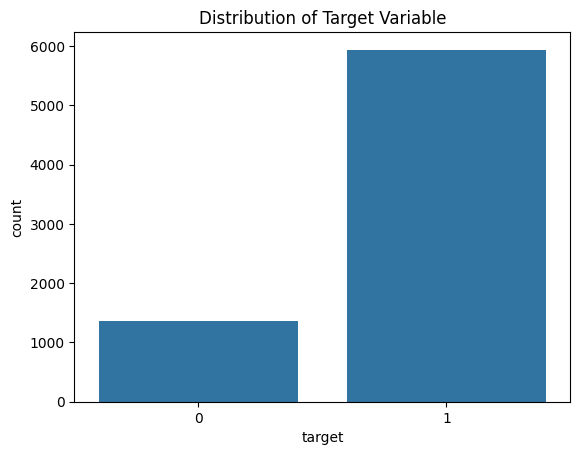

In [216]:
# Distribution of target variable
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable')
plt.show()

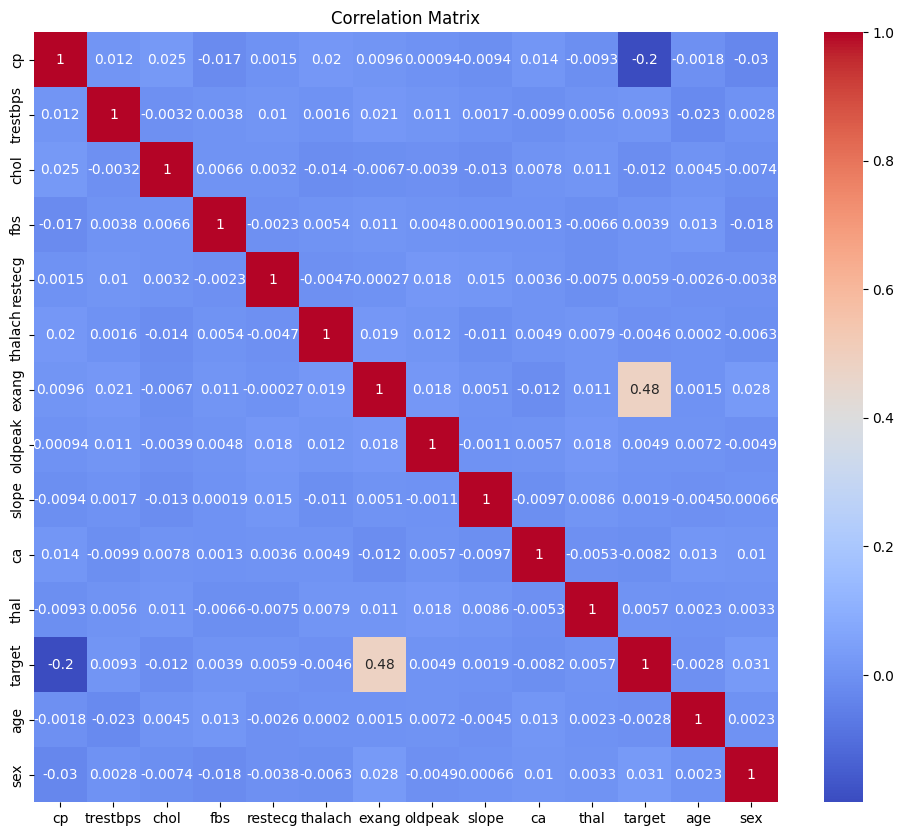

In [217]:
# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

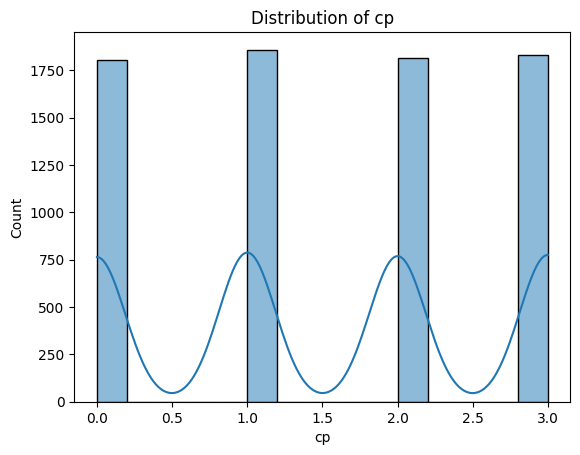

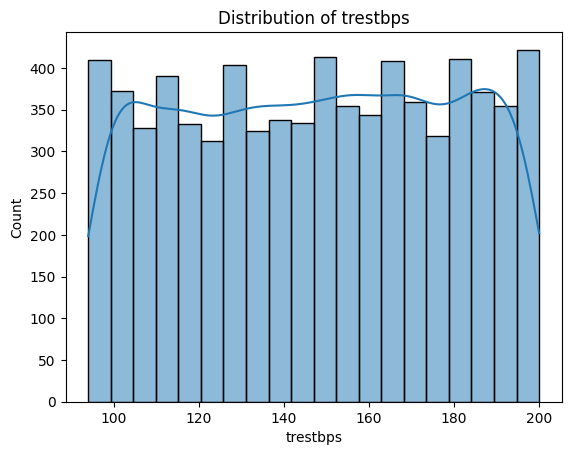

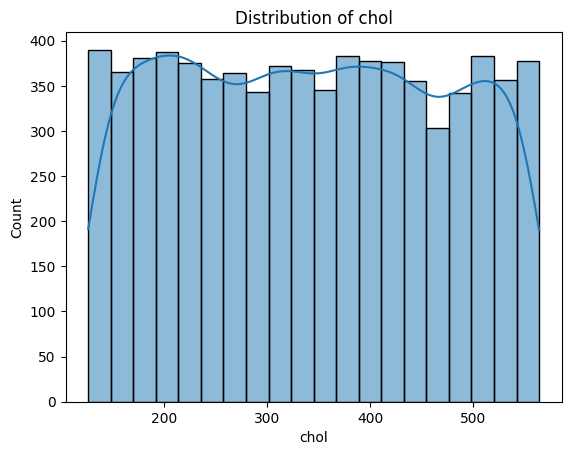

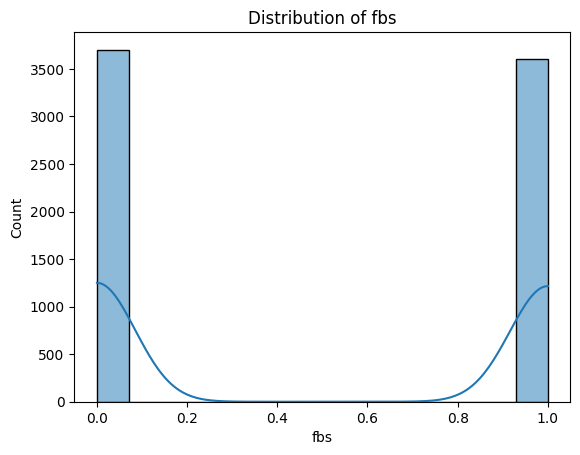

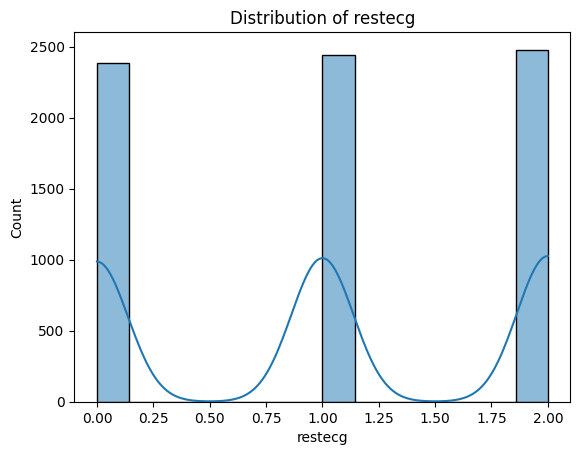

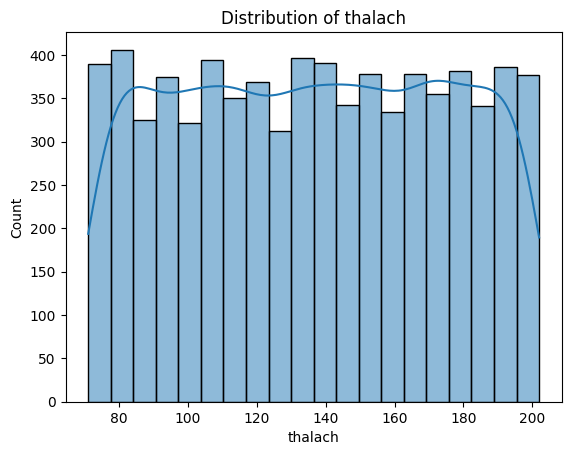

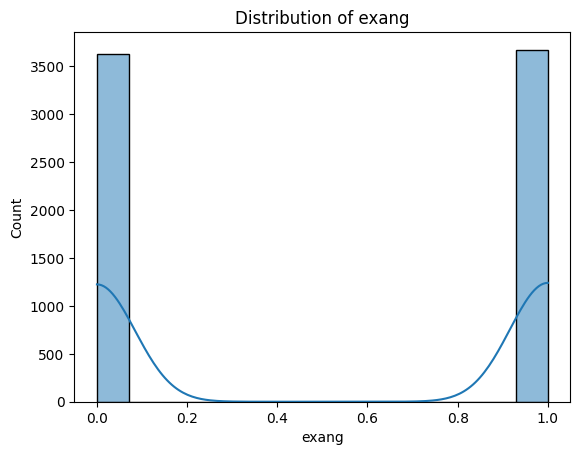

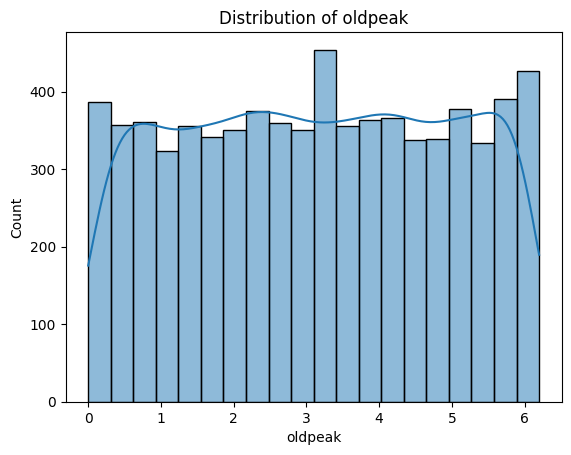

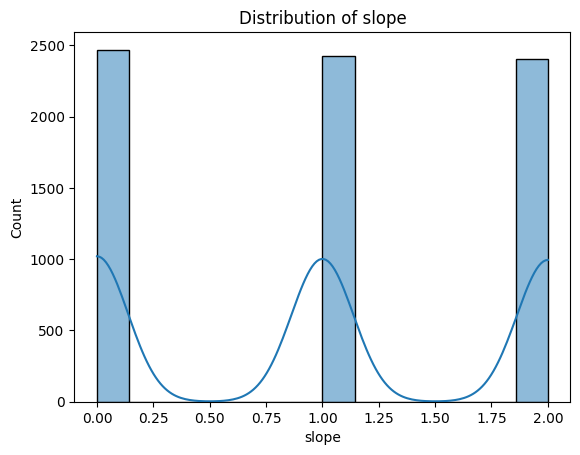

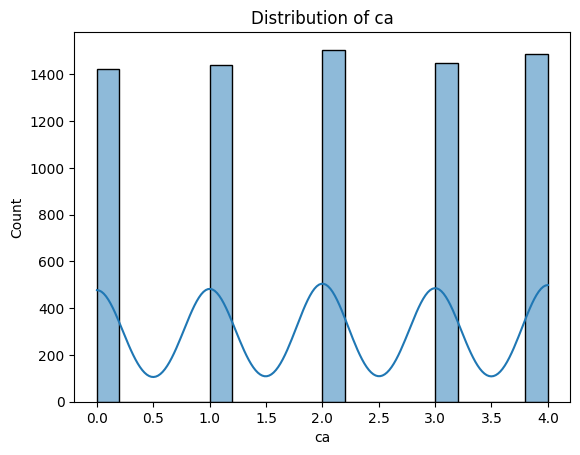

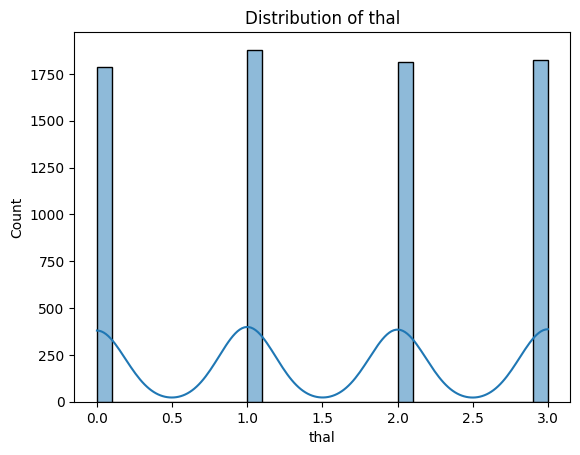

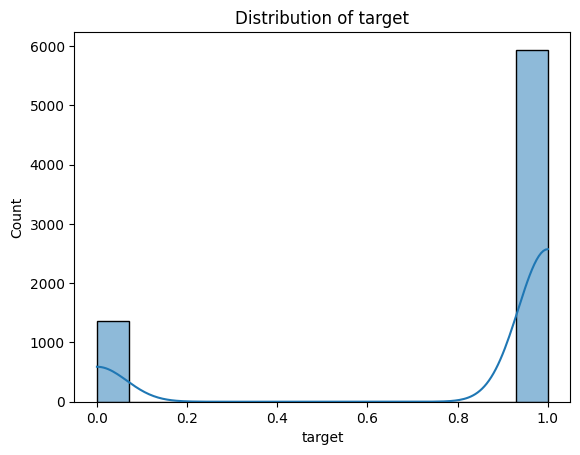

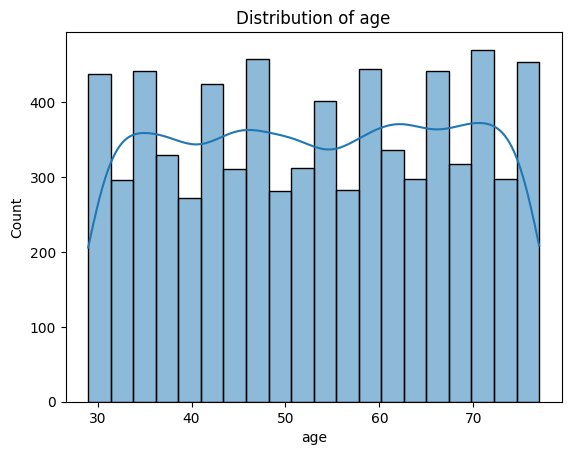

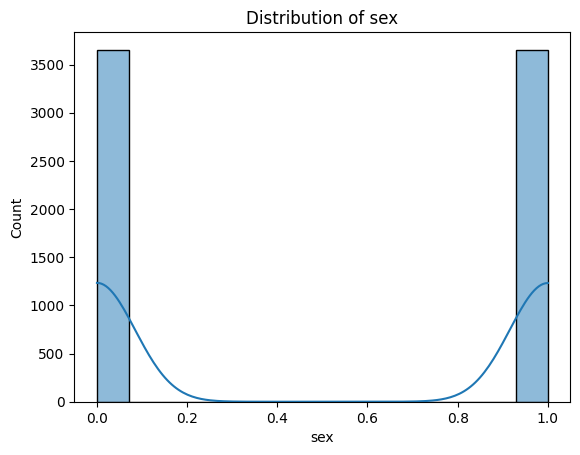

In [218]:
# Histograms for individual features
for column in df.columns:
  if df[column].dtype != 'object':
    plt.figure()
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

# Analyze categorical features
for column in df.columns:
  if df[column].dtype == 'object':
    print(f'{column}: {df[column].value_counts()}')
    plt.figure()
    sns.countplot(x=column, hue='target', data=df)
    plt.title(f'Count plot of {column} vs target')
    plt.show()


DATA PREPROCESSING

In [219]:
def trestbps(x):
  #Normal
  if x < 120:
    return 0
  #Prehypertension
  elif x >= 120 and x <= 139:
    return 1
  #Stage 1 hypertension
  elif x >= 140 and x <= 159:
    return 2
  #Stage 2 hypertension
  elif x >= 160:
    return 3

In [220]:
def chol(x):
  #Optimal: less than 100 mg/ dL. Near optimal/above optimal:100 to 129 mg/dL. Borderline high: 130 to 159 mg/dL. High: 160 to 189 mg/dL.
  if x < 100:
    return 0
  elif x >= 100 and x <= 129:
    return 1
  elif x >= 130 and x <= 159:
    return 2
  elif x >= 160:
    return 3

In [221]:
def age(x):
  if x>=29 and x<=40:
    return 0
  elif x>=41 and x<=52:
    return 1
  elif x>=53 and x<=64:
    return 2
  elif x>=65:
    return 3

In [222]:
test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,70,1,0,163,495,0,2,170,1,2.0,1,0,1
1,61,1,0,131,238,0,2,74,1,4.9,2,2,2
2,53,1,0,95,558,1,1,73,1,0.7,1,1,0
3,37,0,1,178,287,0,1,192,1,5.7,1,0,0
4,35,0,3,104,281,0,0,122,0,1.3,1,4,3


In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   cp        7303 non-null   int64  
 1   trestbps  7303 non-null   int64  
 2   chol      7303 non-null   int64  
 3   fbs       7303 non-null   int64  
 4   restecg   7303 non-null   int64  
 5   thalach   7303 non-null   int64  
 6   exang     7303 non-null   int64  
 7   oldpeak   7303 non-null   float64
 8   slope     7303 non-null   int64  
 9   ca        7303 non-null   int64  
 10  thal      7303 non-null   int64  
 11  target    7303 non-null   int64  
 12  age       7303 non-null   int64  
 13  sex       7303 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 798.9 KB


In [224]:
abs(df.corr())

,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age,sex
cp,1.000000,0.011924,0.024823,0.016848,0.001544,0.019503,0.009621,0.000942,0.009439,0.013676,0.009296,0.198082,0.001771,0.030134
trestbps,0.011924,1.000000,0.003238,0.003757,0.010334,0.001575,0.021449,0.011277,0.001750,0.009947,0.005632,0.009320,0.022767,0.002793
chol,0.024823,0.003238,1.000000,0.006588,0.003218,0.014182,0.006674,0.003930,0.013061,0.007788,0.011114,0.012291,0.004541,0.007434
fbs,0.016848,0.003757,0.006588,1.000000,0.002298,0.005419,0.010908,0.004803,0.000191,0.001255,0.006554,0.003925,0.012960,0.017675
restecg,0.001544,0.010334,0.003218,0.002298,1.000000,0.004714,0.000270,0.017644,0.015365,0.003593,0.007497,0.005911,0.002644,0.003850
thalach,0.019503,0.001575,0.014182,0.005419,0.004714,1.000000,0.019037,0.012347,0.010617,0.004899,0.007943,0.004634,0.000204,0.006331
exang,0.009621,0.021449,0.006674,0.010908,0.000270,0.019037,1.000000,0.018074,0.005094,0.012028,0.010875,0.481897,0.001495,0.027802
oldpeak,0.000942,0.011277,0.003930,0.004803,0.017644,0.012347,0.018074,1.000000,0.001137,0.005738,0.017900,0.004899,0.007193,0.004897
slope,0.009439,0.001750,0.013061,0.000191,0.015365,0.010617,0.005094,0.001137,1.000000,0.009720,0.008601,0.001909,0.004480,0.000663
ca,0.013676,0.009947,0.007788,0.001255,0.003593,0.004899,0.012028,0.005738,0.009720,1.000000,0.005304,0.008244,0.013257,0.010203


In [225]:
df['age'] = df['age'].apply(age)
test['age'] = test['age'].apply(age)

In [226]:
df['trestbps'] = df['trestbps'].apply(trestbps)
test['trestbps'] = test['trestbps'].apply(trestbps)

In [227]:
df['chol'] = df['chol'].apply(chol)
test['chol'] = test['chol'].apply(chol)

In [228]:
#normalize thalach
thalach_scaler = StandardScaler()
thalach_scaler = thalach_scaler.fit(df[['thalach']])
df['thalach'] = thalach_scaler.transform(df[['thalach']])
test['thalach'] = thalach_scaler.transform(test[['thalach']])

In [229]:
#normalize oldpeak
oldpeak_scaler = StandardScaler()
oldpeak_scaler = oldpeak_scaler.fit(df[['oldpeak']])
df['oldpeak'] = oldpeak_scaler.transform(df[['oldpeak']])
test['oldpeak'] = oldpeak_scaler.transform(test[['oldpeak']])

In [230]:
df.head()

,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age,sex
0,1,2,3,1,0,0.458684,0,-0.910004,1,4,1,1,0,0
1,2,3,2,0,1,-0.852298,0,-1.300839,2,1,0,0,2,1
2,2,0,3,1,0,0.484904,0,-0.575002,1,3,1,1,0,1
3,0,0,3,1,2,-1.271812,1,0.988337,0,2,2,1,3,0
4,2,1,3,1,1,0.773320,1,-1.245005,2,4,0,1,0,1


In [231]:
abs(df.corr())

,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age,sex
cp,1.000000,0.011965,0.001780,0.016848,0.001544,0.019503,0.009621,0.000942,0.009439,0.013676,0.009296,0.198082,0.002934,0.030134
trestbps,0.011965,1.000000,0.013186,0.002510,0.007225,0.000494,0.017738,0.007630,0.002757,0.010958,0.008889,0.010486,0.018451,0.008887
chol,0.001780,0.013186,1.000000,0.001267,0.011236,0.003993,0.000783,0.006031,0.001309,0.009805,0.004433,0.010817,0.000396,0.008744
fbs,0.016848,0.002510,0.001267,1.000000,0.002298,0.005419,0.010908,0.004803,0.000191,0.001255,0.006554,0.003925,0.011456,0.017675
restecg,0.001544,0.007225,0.011236,0.002298,1.000000,0.004714,0.000270,0.017644,0.015365,0.003593,0.007497,0.005911,0.001382,0.003850
thalach,0.019503,0.000494,0.003993,0.005419,0.004714,1.000000,0.019037,0.012347,0.010617,0.004899,0.007943,0.004634,0.002367,0.006331
exang,0.009621,0.017738,0.000783,0.010908,0.000270,0.019037,1.000000,0.018074,0.005094,0.012028,0.010875,0.481897,0.000075,0.027802
oldpeak,0.000942,0.007630,0.006031,0.004803,0.017644,0.012347,0.018074,1.000000,0.001137,0.005738,0.017900,0.004899,0.010997,0.004897
slope,0.009439,0.002757,0.001309,0.000191,0.015365,0.010617,0.005094,0.001137,1.000000,0.009720,0.008601,0.001909,0.004079,0.000663
ca,0.013676,0.010958,0.009805,0.001255,0.003593,0.004899,0.012028,0.005738,0.009720,1.000000,0.005304,0.008244,0.012622,0.010203


FEATURE SELECTION

In [232]:
#Perform Feature Selection

from sklearn.feature_selection import SelectKBest, f_classif

# Separate features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Apply SelectKBest with ANOVA F-value as the scoring function
selector = SelectKBest(score_func=f_classif, k=8)  # Select top 8 features
X_new = selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]

# Print the selected features
print("Selected Features:", selected_features)

# Create a new DataFrame with only the selected features
df_selected = df[selected_features]

Selected Features: Index(['cp', 'trestbps', 'chol', 'restecg', 'exang', 'ca', 'age', 'sex'], dtype='object')


In [233]:
df_selected.columns

Index(['cp', 'trestbps', 'chol', 'restecg', 'exang', 'ca', 'age', 'sex'], dtype='object')

In [234]:
X_train = df[selected_features]
y_train = df['target']

In [235]:
X_test = test[selected_features]

MODEL BUILDING

In [236]:
#Model Training using stacking

from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Define the base learners
estimators = [
    ('lr', LogisticRegression()),
    ('lgbm', LGBMClassifier()),
    ('catboost', CatBoostClassifier(verbose=0))
]

# Define the stacking classifier
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Train the stacking classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)



[LightGBM] [Info] Number of positive: 5941, number of negative: 1362
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000281 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 28
[LightGBM] [Info] Number of data points in the train set: 7303, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.813501 -> initscore=1.472923
[LightGBM] [Info] Start training from score 1.472923
[LightGBM] [Info] Number of positive: 4752, number of negative: 1090
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000238 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 28
[LightGBM] [Info] Number of data points in the train set: 5842, number of used features: 8
[LightGBM] [Info] [binary:BoostF

In [237]:
sub = pd.read_csv('/content/drive/MyDrive/microsoft-x-data-science-nigeria-2024-ai-bootcamp-qualification-hackathon20240918-4983-287w11/Sample Submission.csv')
sub.head()

,Id
0,16501
1,10444
2,14288
3,10409
4,17330


In [238]:
sub['Target'] = y_pred

In [239]:
sub.head()

,Id,Target
0,16501,1
1,10444,1
2,14288,1
3,10409,1
4,17330,0


In [240]:
sub.to_csv('submission.csv', index=False)